In [52]:
import warnings
warnings.filterwarnings(action='ignore')

In [53]:
import pandas as pd

train=pd.read_csv("train_bsd.csv")
test=pd.read_csv("test_bsd.csv")

print(train.shape)
print(test.shape)

datasets=[train,test]

(10886, 12)
(6493, 9)


In [54]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Column 설명
1. datetime : 이 시간과 자전거 대여시간과의 연관성 생각
2. season : (1:봄 2:여름 3:가을 4:겨울)
3. holiday : 공휴일 여부(토일 제외)
4. workingday : 근무일
5. 날씨 : (1:맑음 2:안개or흐림 3:눈or비 4:천둥번개)
6. 온도
7. 체감온도
8. 습도
9. 풍속

10. casual : 비회원 자전거 대여량
11. registered : 회원 자전거 대여량
12. count : 자전거 총대여량

# Preprocessing

# 1. Datetime

In [55]:
train["datetime"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [56]:
for dataset in datasets:
    dataset["datetime"]=pd.to_datetime(dataset["datetime"])
    dataset["datetime"].head()

In [57]:
# train["datetime"].dt.year
# train["datetime"].dt.month
# train["datetime"].dt.day
# train["datetime"].dt.hour
# train["datetime"].dt.minute
# train["datetime"].dt.second

In [58]:
for dataset in datasets:
    dataset["datetime-year"]=dataset["datetime"].dt.year
    dataset["datetime-month"]=dataset["datetime"].dt.month
    dataset["datetime-day"]=dataset["datetime"].dt.day
    dataset["datetime-hour"]=dataset["datetime"].dt.hour
    dataset["datetime-minute"]=dataset["datetime"].dt.minute
    dataset["datetime-second"]=dataset["datetime"].dt.second

In [59]:
train[["datetime-year","datetime-month","datetime-day","datetime-hour","datetime-minute","datetime-second"]].head()

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [60]:
test[["datetime-year","datetime-month","datetime-day","datetime-hour","datetime-minute","datetime-second"]].head()

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0
3,2011,1,20,3,0,0
4,2011,1,20,4,0,0


# Exploratory Data Analysis
## EDA의 정의
original dataset에 없는 feature 항목(e.g. THI)을 새롭게 column으로 삽입하거나 있는 column을 제거하거나 혹은 기존 column을 수정해 주는 행위
## 파이썬의 자동 머신러닝이 있음에도 EDA를 사용해야 하는 이유
1. 파이썬의 머신러닝 알고리즘이 완벽하지 않음
2. 그러므로 사람이 THI를 명시적으로 계산해서 column으로 넣어주어야 함

## idea
1. 일단 분, 초는 자전거 대여량을 판가름하는데 별 영향이 없을 것 같음
2. Dates-day 의미가 없을 듯 함
3. 사람의 행동 패턴 상으로 날짜나 시간이라는 개념이 자전거를 대여하는데 중요한 영향을 미칠 것 같음

In [61]:
import seaborn as sns

In [62]:
import matplotlib.pyplot as plt

<Axes: xlabel='datetime-second', ylabel='count'>

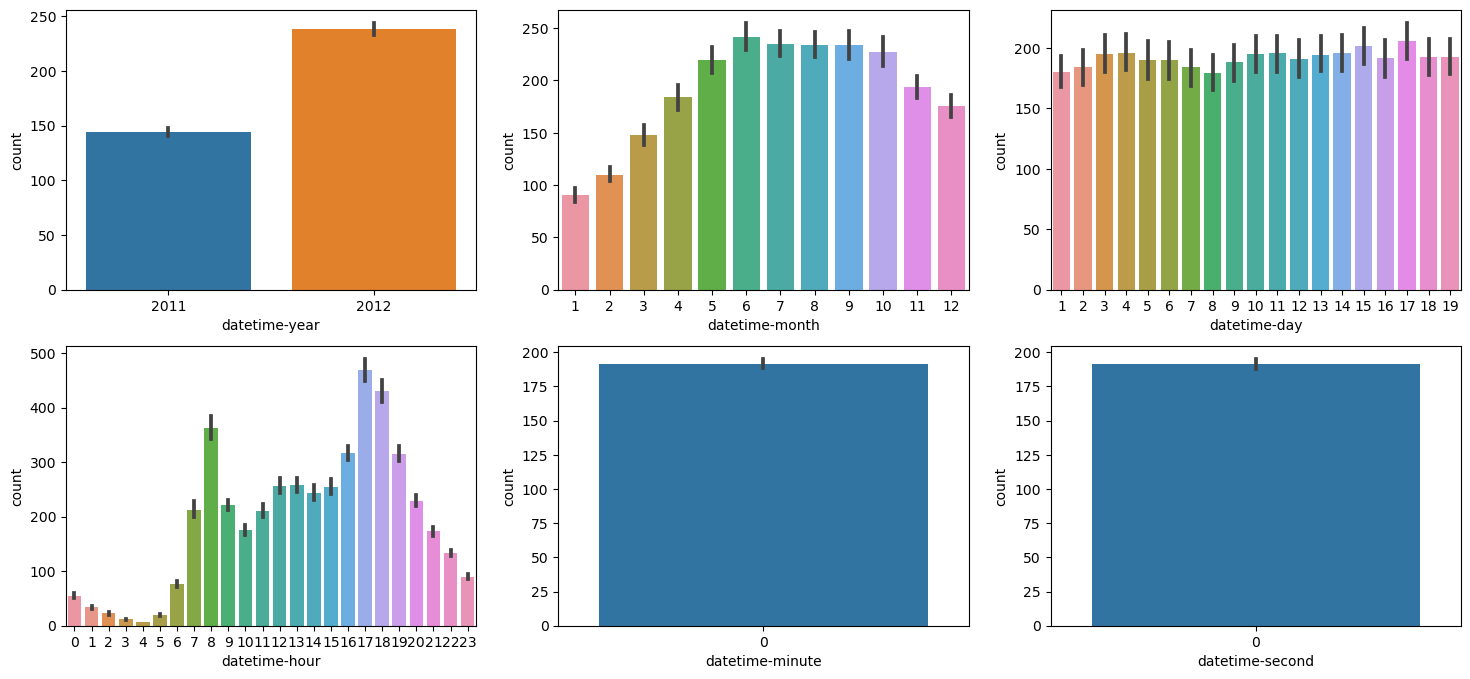

In [63]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)
sns.barplot(data=train,x="datetime-year",y="count",ax=ax1)
sns.barplot(data=train,x="datetime-month",y="count",ax=ax2)
sns.barplot(data=train,x="datetime-day",y="count",ax=ax3)
sns.barplot(data=train,x="datetime-hour",y="count",ax=ax4)
sns.barplot(data=train,x="datetime-minute",y="count",ax=ax5)
sns.barplot(data=train,x="datetime-second",y="count",ax=ax6)

# 2. Weather

<Axes: xlabel='weather', ylabel='count'>

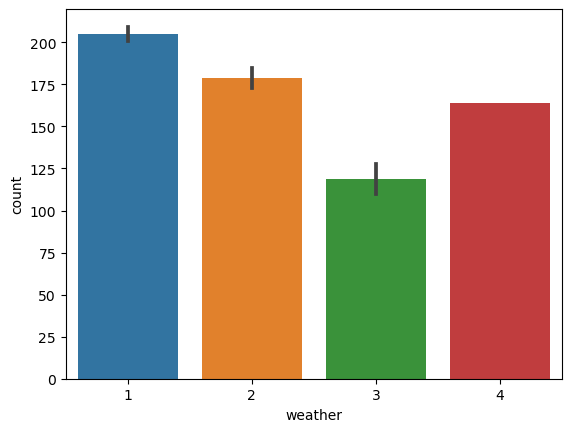

In [64]:
sns.barplot(data=train,x='weather',y="count")

# 3. Windspeed

<Axes: xlabel='windspeed', ylabel='Density'>

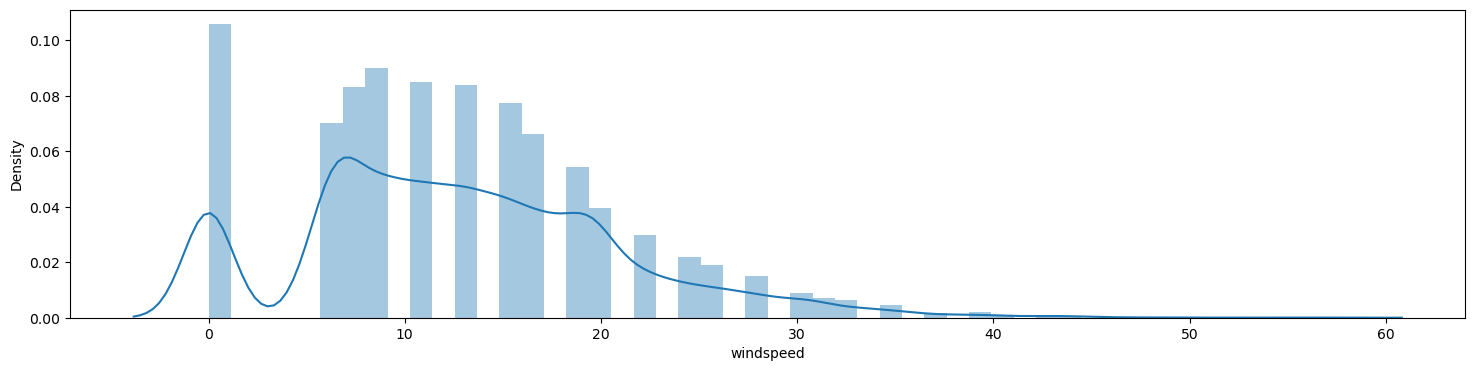

In [65]:
plt.figure(figsize=(18,4))
sns.distplot(train["windspeed"])

<Axes: xlabel='windspeed', ylabel='count'>

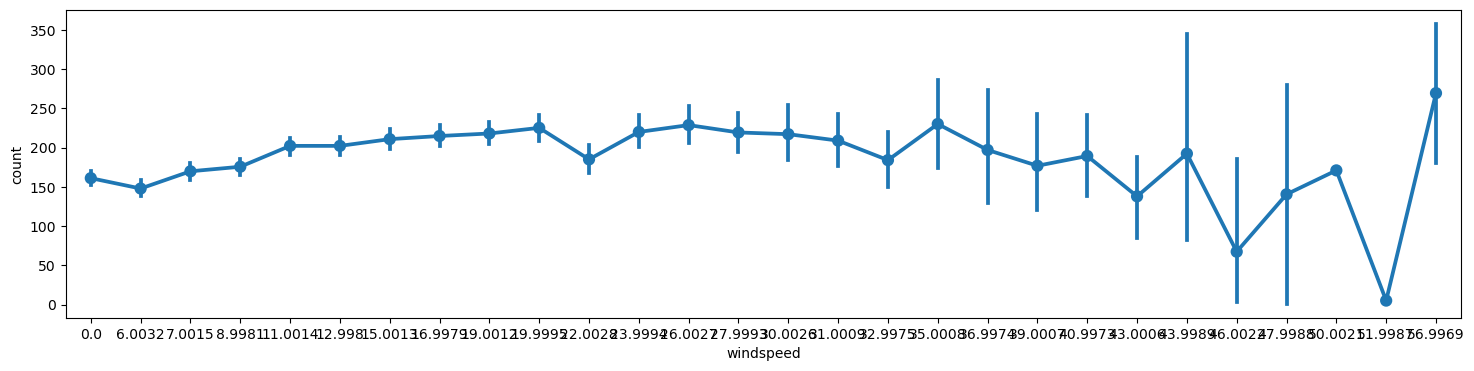

In [66]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x="windspeed",y="count")